## Observations and Insights 

In [207]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_combined = pd.merge(study_results, mouse_metadata, how="outer", on=["Mouse ID", "Mouse ID"])
data_combined.rename(columns={"Age_months": "Age (months)"}, inplace=True)
# Display the data table for preview
data_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [208]:
# Checking the number of mice.
print(f"Total number of mice: {data_combined['Mouse ID'].nunique()}")

Total number of mice: 249


In [209]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = data_combined.loc[data_combined.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(f"Duplicate mouse ID appears both in Mouse ID and Timepoint: {dup_mice}")

Duplicate mouse ID appears both in Mouse ID and Timepoint: ['g989']


In [210]:
# Optional: Get all the data for the duplicate mouse ID. 

# dup_mice_data = data_combined.loc[data_combined.duplicated(subset=['Mouse ID', 'Timepoint',]), ['Mouse ID', 'Timepoint', 
#                                                                                                 'Tumor Volume (mm3)', 'Metastatic Sites', 
#                                                                                                 'Drug Regimen', 'Sex', 'Age (months)', 'Weight (g)']]
dup_mice_data = data_combined.loc[data_combined['Mouse ID'] == "g989"]
dup_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [247]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_combined.copy()
clean_data = clean_data[clean_data['Mouse ID'].isin(dup_mice)==False]
clean_data.reset_index(drop=True, inplace=True)
clean_data.shape

(1880, 8)

In [248]:
# Checking the number of mice in the clean DataFrame.
print(f"Total number of mice in cleaned dataset: {clean_data['Mouse ID'].nunique()}")

Total number of mice in cleaned dataset: 248


## Summary Statistics

In [249]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
sum_df = clean_data.groupby(["Drug Regimen"])
tum_vol_mean = sum_df["Tumor Volume (mm3)"].mean()
tum_vol_med = sum_df["Tumor Volume (mm3)"].median()
tum_vol_var = sum_df["Tumor Volume (mm3)"].var()
tum_vol_sdev = sum_df["Tumor Volume (mm3)"].std()
tum_vol_sem = sum_df["Tumor Volume (mm3)"].sem()

stat_sum_df = pd.DataFrame({"Tumor Volume Mean (mm3)": tum_vol_mean, 
                            "Tumor Volume Med (mm3)": tum_vol_med, 
                            "Tumor Volume Var (mm3)": tum_vol_var,
                            "Tumor Volume Sdev (mm3)": tum_vol_sdev,
                            "Tumor Volume Sem (mm3)": tum_vol_sem})
stat_sum_df = stat_sum_df.reset_index()
stat_sum_df

,Drug Regimen,Tumor Volume Mean (mm3),Tumor Volume Med (mm3),Tumor Volume Var (mm3),Tumor Volume Sdev (mm3),Tumor Volume Sem (mm3)
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [250]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
stat_sum_df1 = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean,np.median,np.var,np.std,st.sem]).rename(columns={'mean':'Tumor Volume Mean (mm3)',
                                                                                                                                      'median':'Tumor Volume Median (mm3)',
                                                                                                                                      'var':'Tumor Volume Var (mm3)',
                                                                                                                                      'std':'Tumor Volume Sdev (mm3)',
                                                                                                                                      'sem':'Tumor Volume Sem (mm3)'}).reset_index()
stat_sum_df1

,Drug Regimen,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Var (mm3),Tumor Volume Sdev (mm3),Tumor Volume Sem (mm3)
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [251]:
clean_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

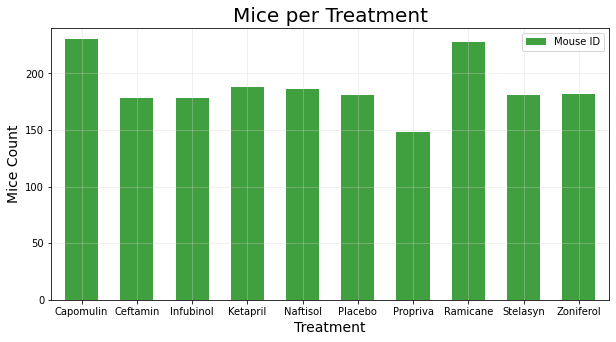

In [252]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
tot_mice = clean_data.groupby("Drug Regimen")["Mouse ID"].count().reset_index()
barplot_pandas = tot_mice.plot(x='Drug Regimen', kind="bar", figsize=(10,5), xlim=(0,10), ylim=(0,240), color='green', alpha=0.75, width = 0.6, stacked=True)
plt.title("Mice per Treatment")
barplot_pandas.grid(True, linestyle='-', which='major', color='lightgrey', alpha=.4)
barplot_pandas.set_xlabel("Treatment", fontsize = 14)
barplot_pandas.set_ylabel("Mice Count", fontsize = 14)
barplot_pandas.set_title("Mice per Treatment", fontsize = 20)
plt.xticks(rotation=0)

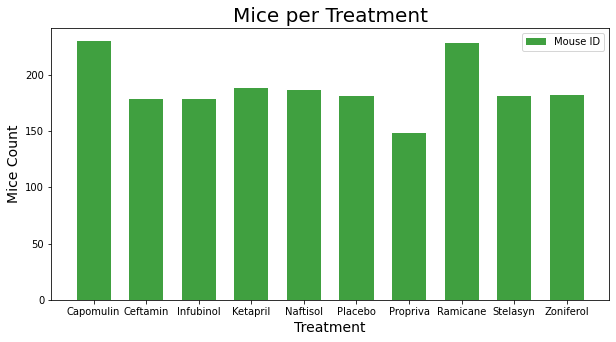

In [253]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(tot_mice))
plt.figure(figsize=(10,5))
plt.bar(x_axis, tot_mice['Mouse ID'], color='green', alpha=0.75, width = 0.65)
x = plt.xticks(x_axis, tot_mice['Drug Regimen'], rotation="horizontal")
plt.title("Mice per Treatment", fontsize = 20)
plt.xlabel("Treatment", fontsize = 14)
plt.ylabel("Mice Count", fontsize = 14)
plt.legend(['Mouse ID'], loc='upper right',prop={'size': 10})

In [279]:
gender_distr = clean_data.groupby("Sex")["Mouse ID"].count().reset_index()
gender_distr['Distribution'] = round((gender_distr['Mouse ID']/gender_distr['Mouse ID'].sum()*100),2)
gender_df = gender_distr.copy()
gender_distr = gender_distr.set_index('Sex')
#del gender_distr['Mouse ID']
gender_distr

,Mouse ID,Distribution
Sex,,
Female,922,49.04
Male,958,50.96


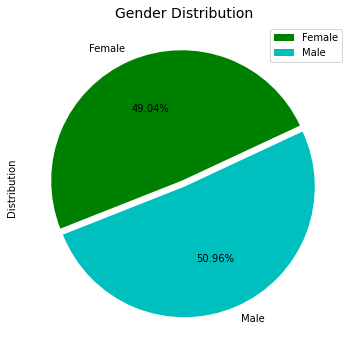

In [256]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pieplot_pandas = gender_distr.plot.pie(y='Distribution', figsize =(6, 6), explode=(0.05,0), colors = 'gc', autopct='%1.2f%%', startangle = 25)
labels = ['Female','Male']
plt.title('Gender Distribution',fontsize = 14)
plt.legend(labels, loc='upper right',prop={'size': 10})

<AxesSubplot:title={'center':'Gemder Distribution'}, ylabel='Distribution'>

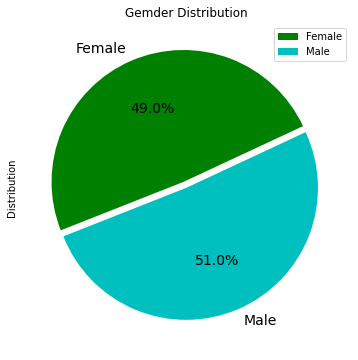

In [285]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df
plt.figure(figsize=(13,13))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = 'Distribution', ax=ax1, autopct='%1.1f%%', 
 startangle=25, shadow=False, labels=gender_df['Sex'], explode=(0.05,0), colors = 'gc', legend = True, fontsize=14, title='Gemder Distribution')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
